# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
city_df = pd.DataFrame({'City' : cities})
city_df['Latitude'] = ""
city_df['Longitude'] = ""
city_df['Max Temp'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness'] = ""
city_df['Wind Speed'] = ""
city_df['Country'] = ""
city_df['Date'] = ""

base_url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in city_df.iterrows():
    city_name = row['City']
    
    params = {
    "q": {city_name},
    "appid" : weather_api_key,
    "units" : "imperial"
    }
    
    print(f"Retrieving Results for Index {index}: {city_name}.")
    
    cities_response = requests.get(base_url, params=params).json()
    time.sleep(1)
   # print(json.dumps(cities_response, indent=4))
   # print(cities_response['dt'])
    
    try:
        print(f"Current wind speed in {city_name} is {cities_response['wind']['speed']}.")
        
        city_df.loc[index, 'Latitude'] = cities_response['coord']['lat']
        city_df.loc[index, 'Longitude'] = cities_response['coord']['lon']
        city_df.loc[index, 'Max Temp'] = cities_response['main']['temp_max']
        city_df.loc[index, 'Humidity'] = cities_response['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = cities_response['clouds']['all']
        city_df.loc[index, 'Wind Speed'] = cities_response['wind']['speed']
        city_df.loc[index, 'Country'] = cities_response['sys']['country']
        city_df.loc[index, 'Date'] = cities_response['dt']

        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
city_df.head()


Retrieving Results for Index 0: tres arroyos.
Current wind speed in tres arroyos is 14.07.
Retrieving Results for Index 1: vaini.
Current wind speed in vaini is 9.17.
Retrieving Results for Index 2: rikitea.
Current wind speed in rikitea is 18.21.
Retrieving Results for Index 3: esperance.
Current wind speed in esperance is 9.17.
Retrieving Results for Index 4: puerto ayacucho.
Current wind speed in puerto ayacucho is 4.72.
Retrieving Results for Index 5: nizhneyansk.
Missing field/result... skipping.
Retrieving Results for Index 6: fukue.
Current wind speed in fukue is 18.7.
Retrieving Results for Index 7: puerto ayora.
Current wind speed in puerto ayora is 8.05.
Retrieving Results for Index 8: barentsburg.
Missing field/result... skipping.
Retrieving Results for Index 9: hambantota.
Current wind speed in hambantota is 3.36.
Retrieving Results for Index 10: punta arenas.
Current wind speed in punta arenas is 25.28.
Retrieving Results for Index 11: tuktoyaktuk.
Current wind speed in tu

Current wind speed in rincon is 6.93.
Retrieving Results for Index 98: aksarka.
Current wind speed in aksarka is 11.48.
Retrieving Results for Index 99: attawapiskat.
Missing field/result... skipping.
Retrieving Results for Index 100: butaritari.
Current wind speed in butaritari is 11.54.
Retrieving Results for Index 101: voznesenye.
Current wind speed in voznesenye is 6.24.
Retrieving Results for Index 102: den helder.
Current wind speed in den helder is 16.11.
Retrieving Results for Index 103: lolua.
Missing field/result... skipping.
Retrieving Results for Index 104: antalaha.
Current wind speed in antalaha is 7.11.
Retrieving Results for Index 105: ilulissat.
Current wind speed in ilulissat is 1.07.
Retrieving Results for Index 106: bredasdorp.
Current wind speed in bredasdorp is 1.12.
Retrieving Results for Index 107: mopipi.
Current wind speed in mopipi is 17.43.
Retrieving Results for Index 108: talnakh.
Current wind speed in talnakh is 13.42.
Retrieving Results for Index 109: vi

Current wind speed in umm lajj is 4.03.
Retrieving Results for Index 195: kodiak.
Current wind speed in kodiak is 4.7.
Retrieving Results for Index 196: naze.
Current wind speed in naze is 4.7.
Retrieving Results for Index 197: igarape-miri.
Missing field/result... skipping.
Retrieving Results for Index 198: pangody.
Current wind speed in pangody is 14.79.
Retrieving Results for Index 199: yuanping.
Current wind speed in yuanping is 0.87.
Retrieving Results for Index 200: diamantino.
Current wind speed in diamantino is 7.78.
Retrieving Results for Index 201: santarem.
Current wind speed in santarem is 11.41.
Retrieving Results for Index 202: khuzhir.
Current wind speed in khuzhir is 11.36.
Retrieving Results for Index 203: isangel.
Current wind speed in isangel is 8.1.
Retrieving Results for Index 204: belushya guba.
Missing field/result... skipping.
Retrieving Results for Index 205: zhangzhou.
Current wind speed in zhangzhou is 17.9.
Retrieving Results for Index 206: tutoia.
Current w

Current wind speed in erzin is 1.57.
Retrieving Results for Index 294: grand gaube.
Current wind speed in grand gaube is 1.99.
Retrieving Results for Index 295: constitucion.
Current wind speed in constitucion is 4.63.
Retrieving Results for Index 296: chokurdakh.
Current wind speed in chokurdakh is 2.28.
Retrieving Results for Index 297: vao.
Current wind speed in vao is 15.61.
Retrieving Results for Index 298: bambanglipuro.
Current wind speed in bambanglipuro is 4.23.
Retrieving Results for Index 299: wahran.
Missing field/result... skipping.
Retrieving Results for Index 300: stupava.
Current wind speed in stupava is 10.29.
Retrieving Results for Index 301: guerrero negro.
Current wind speed in guerrero negro is 5.53.
Retrieving Results for Index 302: dutse.
Current wind speed in dutse is 2.33.
Retrieving Results for Index 303: kalmunai.
Current wind speed in kalmunai is 0.83.
Retrieving Results for Index 304: jizan.
Current wind speed in jizan is 6.93.
Retrieving Results for Index 

Current wind speed in tiznit is 3.8.
Retrieving Results for Index 392: ponta delgada.
Current wind speed in ponta delgada is 8.05.
Retrieving Results for Index 393: tevaitoa.
Current wind speed in tevaitoa is 11.52.
Retrieving Results for Index 394: darhan.
Current wind speed in darhan is 4.25.
Retrieving Results for Index 395: springbok.
Current wind speed in springbok is 2.48.
Retrieving Results for Index 396: najran.
Current wind speed in najran is 4.7.
Retrieving Results for Index 397: praia.
Current wind speed in praia is 12.75.
Retrieving Results for Index 398: pavlodar.
Current wind speed in pavlodar is 10.04.
Retrieving Results for Index 399: klaksvik.
Current wind speed in klaksvik is 2.24.
Retrieving Results for Index 400: aquin.
Current wind speed in aquin is 3.
Retrieving Results for Index 401: nisia floresta.
Current wind speed in nisia floresta is 14.99.
Retrieving Results for Index 402: aklavik.
Current wind speed in aklavik is 3.62.
Retrieving Results for Index 403: phe

Current wind speed in tukrah is 4.16.
Retrieving Results for Index 490: richards bay.
Current wind speed in richards bay is 5.75.
Retrieving Results for Index 491: solovetskiy.
Missing field/result... skipping.
Retrieving Results for Index 492: jasper.
Current wind speed in jasper is 27.51.
Retrieving Results for Index 493: provideniya.
Current wind speed in provideniya is 6.71.
Retrieving Results for Index 494: tornio.
Current wind speed in tornio is 4.7.
Retrieving Results for Index 495: rehoboth.
Current wind speed in rehoboth is 9.28.
Retrieving Results for Index 496: carauari.
Current wind speed in carauari is 2.08.
Retrieving Results for Index 497: guaruja.
Current wind speed in guaruja is 3.47.
Retrieving Results for Index 498: freeport.
Current wind speed in freeport is 11.41.
Retrieving Results for Index 499: tabas.
Current wind speed in tabas is 6.93.
Retrieving Results for Index 500: marrakesh.
Current wind speed in marrakesh is 9.17.
Retrieving Results for Index 501: kumo.


Current wind speed in victoria is 1.01.
Retrieving Results for Index 589: mahadday weyne.
Missing field/result... skipping.
Retrieving Results for Index 590: baikunthpur.
Current wind speed in baikunthpur is 4.61.
Retrieving Results for Index 591: alyangula.
Current wind speed in alyangula is 10.18.
Retrieving Results for Index 592: sao borja.
Current wind speed in sao borja is 5.3.
Retrieving Results for Index 593: tlacotepec.
Current wind speed in tlacotepec is 6.98.
Retrieving Results for Index 594: deder.
Current wind speed in deder is 3.67.
Retrieving Results for Index 595: puerto castilla.
Current wind speed in puerto castilla is 11.41.
Retrieving Results for Index 596: porto novo.
Current wind speed in porto novo is 12.75.
Retrieving Results for Index 597: msanga.
Current wind speed in msanga is 19.46.
Retrieving Results for Index 598: sistranda.
Current wind speed in sistranda is 9.17.
Retrieving Results for Index 599: ville-marie.
Current wind speed in ville-marie is 13.87.
Re

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tres arroyos,-38.37,-60.28,58.48,45,0,14.07,AR,1602704002
1,vaini,-21.2,-175.2,73.4,73,90,9.17,TO,1602704003
2,rikitea,-23.12,-134.97,73.9,79,53,18.21,PF,1602703387
3,esperance,-33.87,121.9,57.2,100,90,9.17,AU,1602703846
4,puerto ayacucho,5.66,-67.62,89.64,60,0,4.72,VE,1602704006


In [8]:
len(city_df)

605

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
city_df.set_index('City')
city_df.to_csv("Output File/city_data.csv")
city_df.head()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
tres arroyos,-38.37,-60.28,58.48,45,0,14.07,AR,1602704002
vaini,-21.2,-175.2,73.4,73,90,9.17,TO,1602704003
rikitea,-23.12,-134.97,73.9,79,53,18.21,PF,1602703387
esperance,-33.87,121.9,57.2,100,90,9.17,AU,1602703846
puerto ayacucho,5.66,-67.62,89.64,60,0,4.72,VE,1602704006


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tres arroyos,-38.37,-60.28,58.48,45.0,0.0,14.07,AR,1.602704e+09
1,vaini,-21.20,-175.20,73.40,73.0,90.0,9.17,TO,1.602704e+09
2,rikitea,-23.12,-134.97,73.90,79.0,53.0,18.21,PF,1.602703e+09
3,esperance,-33.87,121.90,57.20,100.0,90.0,9.17,AU,1.602704e+09
4,puerto ayacucho,5.66,-67.62,89.64,60.0,0.0,4.72,VE,1.602704e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [40]:
city_data.dtypes

City           object
Latitude      float64
Longitude     float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
#check to see if cities with humidity of 100+ exist
city_data.loc[city_data['Humidity'] >= 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,esperance,-33.87,121.90,57.20,100.0,90.0,9.17,AU,1.602704e+09
9,hambantota,6.12,81.12,78.80,100.0,20.0,3.36,LK,1.602704e+09
12,mae sai,20.43,99.88,73.99,100.0,93.0,1.63,TH,1.602704e+09
108,talnakh,69.49,88.40,23.00,100.0,75.0,13.42,RU,1.602704e+09
311,dudinka,69.41,86.18,23.00,100.0,75.0,13.42,RU,1.602704e+09
345,puri,19.80,85.85,77.00,100.0,40.0,3.36,IN,1.602704e+09
349,kuching,1.55,110.33,73.40,100.0,40.0,2.35,MY,1.602704e+09
380,petropavlovsk-kamchatskiy,53.05,158.65,41.00,100.0,75.0,2.24,RU,1.602704e+09
403,phek,25.67,94.50,58.28,100.0,45.0,1.48,IN,1.602704e+09
517,grand forks,47.94,-97.43,42.80,100.0,90.0,18.34,US,1.602705e+09


In [4]:
#Create new df with only cities of less than 100% humidity
clean_data = pd.DataFrame(city_data.loc[city_data['Humidity'] < 100])
clean_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tres arroyos,-38.37,-60.28,58.48,45.0,0.0,14.07,AR,1.602704e+09
1,vaini,-21.20,-175.20,73.40,73.0,90.0,9.17,TO,1.602704e+09
2,rikitea,-23.12,-134.97,73.90,79.0,53.0,18.21,PF,1.602703e+09
4,puerto ayacucho,5.66,-67.62,89.64,60.0,0.0,4.72,VE,1.602704e+09
6,fukue,32.69,128.84,68.22,60.0,5.0,18.70,JP,1.602704e+09
...,...,...,...,...,...,...,...,...,...
600,nongan,44.38,125.17,32.00,74.0,9.0,8.95,CN,1.602705e+09
601,san lorenzo,-25.33,-57.53,77.00,73.0,54.0,25.28,PY,1.602705e+09
602,saint anthony,45.02,-93.22,62.01,51.0,1.0,16.11,US,1.602705e+09
603,turayf,31.67,38.66,69.80,49.0,0.0,4.70,SA,1.602705e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

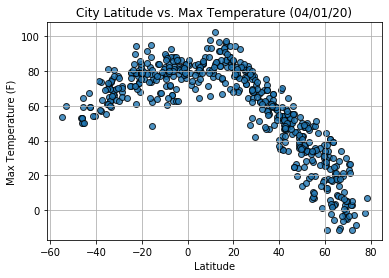

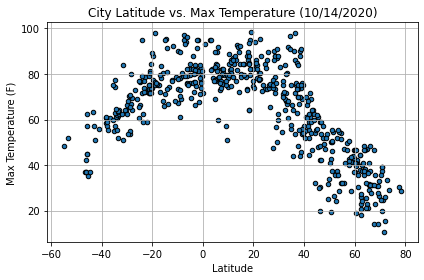

In [5]:
clean_data.plot(kind='scatter', x='Latitude', y='Max Temp', edgecolors='black')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (10/14/2020)')
plt.tight_layout()
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

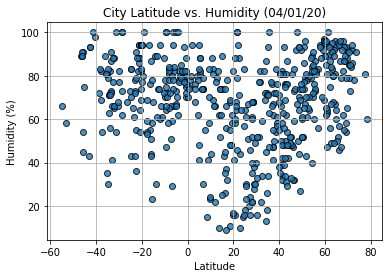

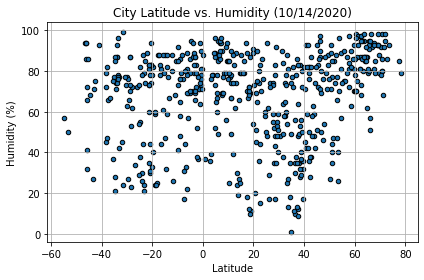

In [6]:
clean_data.plot(kind='scatter', x='Latitude', y='Humidity', edgecolors='black')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (10/14/2020)')
plt.tight_layout()
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

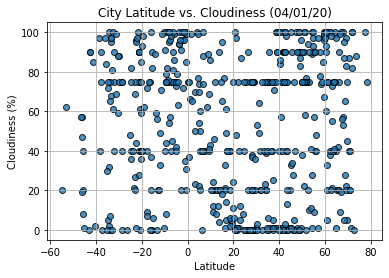

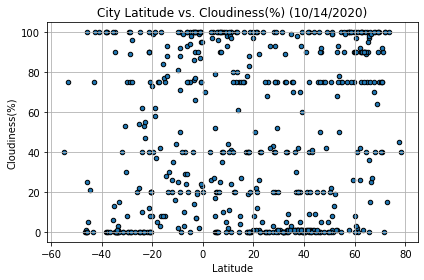

In [7]:
clean_data.plot(kind='scatter', x='Latitude', y='Cloudiness', edgecolors='black')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness(%) (10/14/2020)')
plt.tight_layout()
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

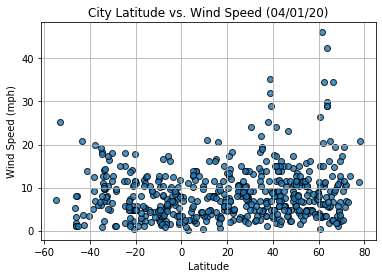

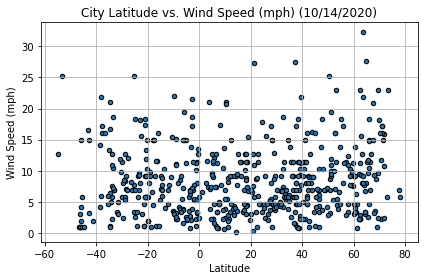

In [8]:
clean_data.plot(kind='scatter', x='Latitude', y='Wind Speed', edgecolors='black')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (mph) (10/14/2020)')
plt.tight_layout()
plt.grid()
plt.show()

## Linear Regression

In [22]:
#set up variables
n_lat = clean_data.loc[clean_data['Latitude'] >= 0]
s_lat = clean_data.loc[clean_data['Latitude'] < 0]

n_lat_int = n_lat['Latitude'].astype(int)
s_lat_int = s_lat['Latitude'].astype(int)

ntemp = n_lat['Max Temp'].astype(int)
stemp = s_lat['Max Temp'].astype(int)

ncloud = n_lat['Cloudiness'].astype(int)
scloud = s_lat['Cloudiness'].astype(int)

nwind = n_lat['Wind Speed'].astype(int)
swind = s_lat['Wind Speed'].astype(int)

nhum = n_lat['Humidity'].astype(int).astype(int)
shum = s_lat['Humidity'].astype(int)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared : 0.72, Correlation Coefficient : -0.85


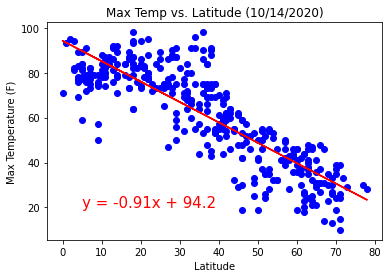

In [120]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_int, ntemp)
regress_values = n_lat_int * slope + intercept


plt.scatter(n_lat_int,ntemp, marker='o', facecolors='blue')
plt.plot(n_lat_int,regress_values,"r-")


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(n_lat_int, ntemp)[0],2)}"

plt.annotate(line_eq,(5, 20),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude (10/14/2020)")


plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared : 0.55, Correlation Coefficient : 0.74


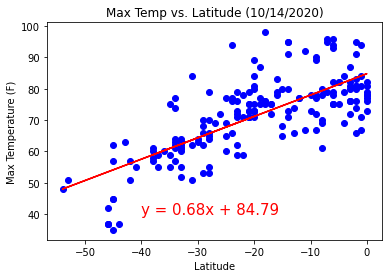

In [92]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_int,stemp)
regress_values = s_lat_int * slope + intercept


plt.scatter(s_lat_int, stemp, marker='o', facecolors='blue')
plt.plot(s_lat_int, regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(stemp,s_lat_int)[0],2)}"

plt.annotate(line_eq,(-40, 40),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude (10/14/2020)")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


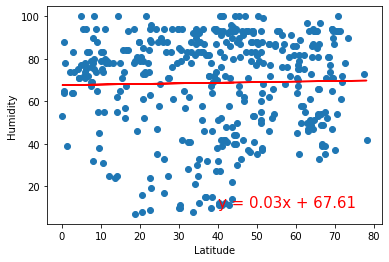

r-squared : 0.06, Correlation Coefficient : 0.24


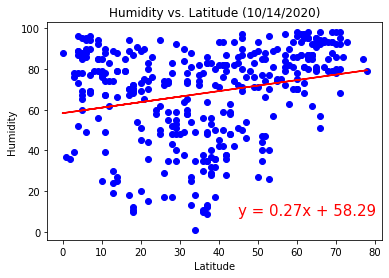

In [119]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_int, nhum)
regress_values = n_lat_int * slope + intercept


plt.scatter(n_lat_int, nhum, marker='o', facecolors='blue')
plt.plot(n_lat_int,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(n_lat_int, nhum)[0],2)}"

plt.annotate(line_eq,(45, 8),fontsize=15,color="red")
print(rsquared, cc)


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (10/14/2020)")


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

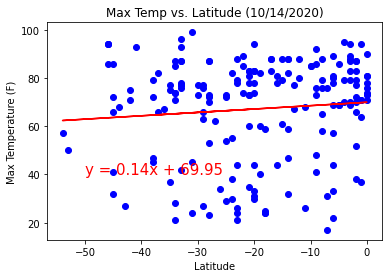

In [98]:
def plot_linear_regression(s_lat_int, shum, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_int,shum)
regress_values = s_lat_int * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat_int, shum, marker='o', facecolors='blue')
plt.plot(s_lat_int,regress_values,"r-")
#rsquared = f"r-squared : {(round(rvalue**2,2))}"
#cc = f"Correlation Coefficient : {round(st.pearsonr(stemp,s_lat_int)[0],2)}"
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
#plt.annotate(cc, (13, 20))
#plt.annotate(slope, -7, 20)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (10/14/2020)")

plt.show()
plot_linear_regression(s_lat_int, shum, 'Humidity')

The r-value is: 0.014985174297345524


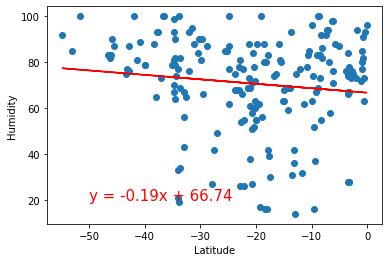

r-squared : 0.01, Correlation Coefficient : 0.09


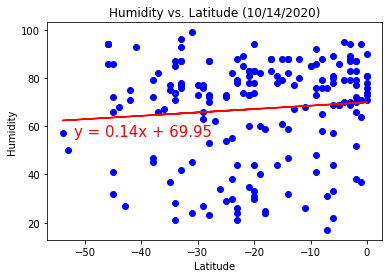

In [118]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_int, shum)
regress_values = s_lat_int * slope + intercept


plt.scatter(s_lat_int, shum, marker='o', facecolors='blue')
plt.plot(s_lat_int, regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(s_lat_int, shum)[0],2)}"

plt.annotate(line_eq,(-52, 56),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (10/14/2020)")


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


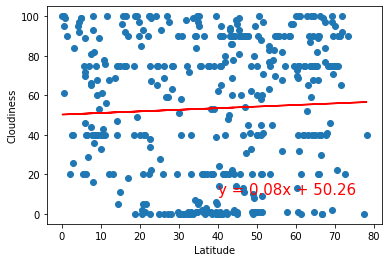

r-squared : 0.03, Correlation Coefficient : 0.17


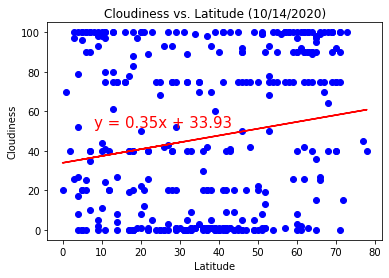

In [111]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_int, ncloud)
regress_values = n_lat_int * slope + intercept


plt.scatter(n_lat_int, ncloud, marker='o', facecolors='blue')
plt.plot(n_lat_int,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(n_lat_int, ncloud)[0],2)}"

plt.annotate(line_eq,(8, 52),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude (10/14/2020)")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


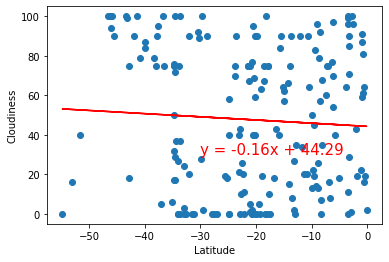

r-squared : 0.11, Correlation Coefficient : 0.33


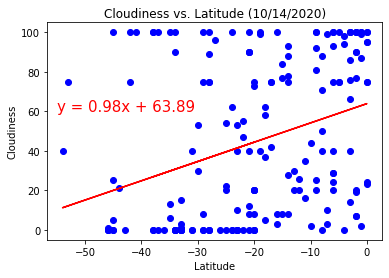

In [109]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_int, scloud)
regress_values = s_lat_int * slope + intercept


plt.scatter(s_lat_int, scloud, marker='o', facecolors='blue')
plt.plot(s_lat_int, regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(s_lat_int, scloud)[0],2)}"

plt.annotate(line_eq,(-55, 60),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude (10/14/2020)")


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


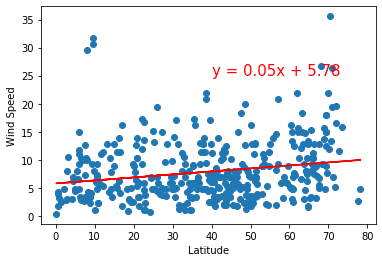

r-squared : 0.04, Correlation Coefficient : 0.2


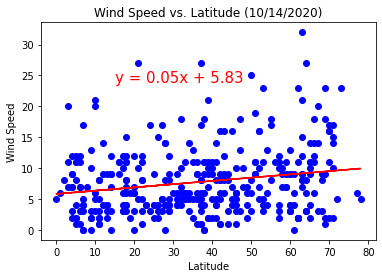

In [108]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_int, nwind)
regress_values = n_lat_int * slope + intercept


plt.scatter(n_lat_int, nwind, marker='o', facecolors='blue')
plt.plot(n_lat_int,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(n_lat_int, nwind)[0],2)}"

plt.annotate(line_eq,(15, 24),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude (10/14/2020)")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


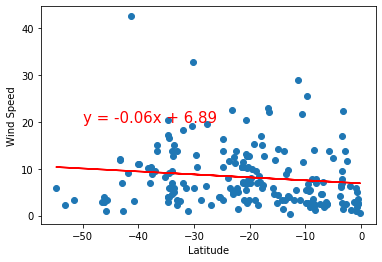

r-squared : 0.0, Correlation Coefficient : -0.07


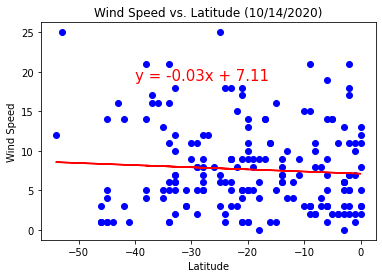

In [106]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_int, swind)
regress_values = s_lat_int * slope + intercept


plt.scatter(s_lat_int, swind, marker='o', facecolors='blue')
plt.plot(s_lat_int, regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(s_lat_int, swind)[0],2)}"

plt.annotate(line_eq,(-40, 19),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude (10/14/2020)")


plt.show()